In [32]:
import gym
import numpy as np
import matplotlib.pyplot as plt

In [33]:
env = gym.make('FrozenLake-v0')

[2017-04-17 22:32:44,058] Making new env: FrozenLake-v0


In [34]:
Q = np.zeros([env.observation_space.n,env.action_space.n])

In [35]:
print(Q)

[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]


In [36]:
learning_rate = .85
dis = .99
num_episodes = 2000
print(learning_rate, dis, num_episodes)

0.85 0.99 2000


In [37]:
rList = []
for i in range(num_episodes):
    state = env.reset()
    rAll = 0
    done = False
    
    while not done:
        action = np.argmax(Q[state,:] + np.random.rand(1, env.action_space.n) / (i + 1))
        
        """
        출처 :https://mingrammer.com/underscore-in-python
        _의 의미는 
        1. 인터프리터(Interpreter)에서 마지막 값을 저장할 때
        2. 값을 무시하고 싶을 때 (흔히 “I don’t care”라고 부른다.)
        3. 변수나 함수명에 특별한 의미 또는 기능을 부여하고자 할 때
        4. 국제화(Internationalization, i18n)/지역화(Localization, l10n) 함수로써 사용할 때
        5. 숫자 리터럴값의 자릿수 구분을 위한 구분자로써 사용할 때
        
        '_' ( = throwaway variable)
        굳이 어떤 변수에 값을 할당해서 쓰지 않을 경우에 사용하는 syntax.
        
        """
        new_state, reward, done, _ = env.step(action)
        Q[state,action] = (1-learning_rate)*Q[state,action] + learning_rate*(reward + dis*(np.max(Q[new_state,:])))
        rAll += reward
        state = new_state
    rList.append(rAll)

In [38]:
print("score time :" + str(sum(rList) / num_episodes))
print("Final Q-table Values")
print(Q)

score time :0.4155
Final Q-table Values
[[  6.15332988e-03   6.17090331e-03   5.82671325e-01   5.93761761e-03]
 [  1.05098766e-03   6.86783036e-04   1.22033071e-05   4.14846885e-01]
 [  1.12550772e-03   4.51987548e-03   1.19277703e-03   2.90433228e-01]
 [  7.66263502e-04   8.29515465e-04   5.93977867e-05   2.25576390e-01]
 [  6.64885938e-01   2.87494265e-04   9.33086193e-05   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  3.63059711e-02   5.86749913e-05   9.58972849e-06   2.33303539e-06]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  5.35782367e-05   0.00000000e+00   5.76937597e-06   7.05281813e-01]
 [  0.00000000e+00   9.06057956e-01   2.93777995e-04   0.00000000e+00]
 [  9.12354364e-01   3.64089230e-04   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00  

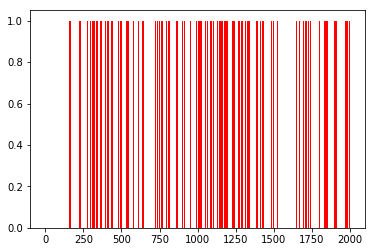

In [39]:
plt.figure(1)
plt.bar(range(len(rList)), rList, color="red")
plt.show()